![Astrofisica Computacional](../../../logo.png)

---
## Example 02.

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this worksheet, we use a synthetic dataset to illustrate the use of `matplotlib` in visualization.

---

### Intalling the `astroML` Package

In order to work with the `astroML` package we install it. Detailed instruictions at 
https://www.astroml.org/user_guide/installation.html#installation



### Generation of the dataset in astroML 

Using the `generate_mu_z` module of the `astroML` package, we simulate a set of 100 supernovas, to obtain the values of the distance modulus ( $\mu$ ), redshift ( $ z $ ) and error ( $d\mu$ ).
Detailed information about this module can be found at
https://www.astroml.org/modules/generated/astroML.datasets.generate_mu_z.html


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from astroML.datasets import generate_mu_z

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=21)

Plot the dataset using `pyplot`.

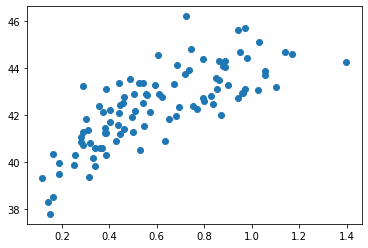

In [4]:
plt.plot(z_sample, mu_sample, 'o')
plt.show()

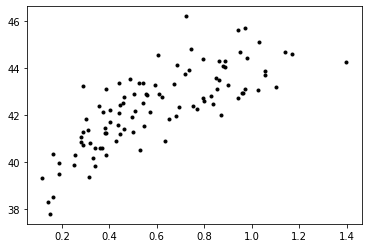

In [7]:
plt.plot(z_sample, mu_sample, '.k')
plt.show()

Format the axis labels of the plot.

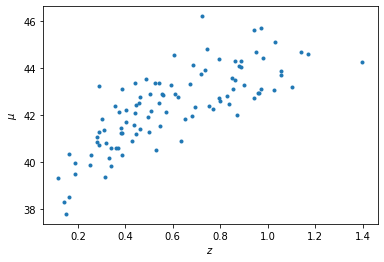

In [8]:
plt.plot(z_sample, mu_sample, '.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.show()

Include the error in the dataset.

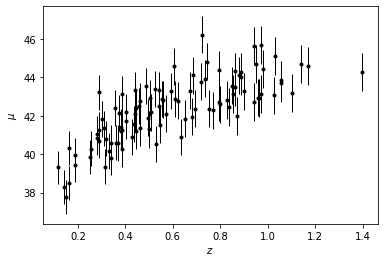

In [9]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', lw=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.show()

### Generating alternative data with astropy

For comparison, we use the module `LambdaCDM` from the `astropy` package to generate a FLRW cosmology with a cosmological constant and curvature. The used values for this cosmology are

$H_0 = 70 $ : Hubble Constant at $z=0$ in [km/sec/Mpc]

$\Omega^{M}_0 = 0.3 $ : Density of non-relativistic matter at $z=0$

$\Omega^{DE}_0 = 0.7$ : Density of dark energy (cosmological constant) at $z=0$

$T^{CMB}_0=0$ : Temperature of the CMB at $z=0$ in [K]

Using this model and the function `distmod` from the `astropy` package, we calculate the distance modulus for a given range of redshift, $z$. 

More information about these packages is found at

https://docs.astropy.org/en/stable/api/astropy.cosmology.LambdaCDM.html#

https://kbarbary-astropy.readthedocs.io/en/latest/_generated/astropy.cosmology.funcs.distmod.html#astropy.cosmology.funcs.distmod

In [10]:
from astropy.cosmology import LambdaCDM

cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)
z = np.linspace(0.01, 2, 1000)
mu_true = cosmo.distmod(z)

Plot the data from `astroML` with errors together with the curve obtained from `astropy`.

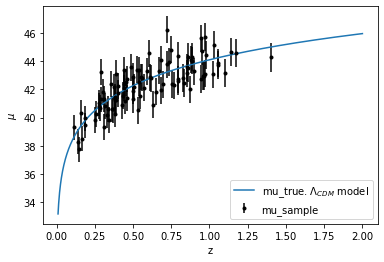

In [11]:
plt.plot(z, mu_true, '-', label='mu_true. $\Lambda_{CDM}$ model')
plt.errorbar(z_sample, mu_sample,dmu, fmt='k.', label='mu_sample')
plt.xlabel(r'z')
plt.ylabel(r'$\mu$')
plt.legend()
plt.show()

---
### Seaborn Styles

In [12]:
import seaborn as sns
sns.set()

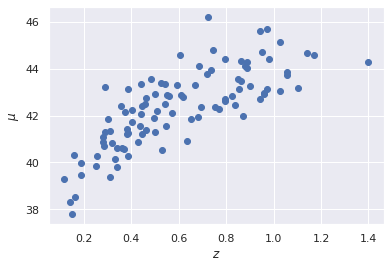

In [13]:
plt.plot(z_sample, mu_sample, 'o')
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.show()

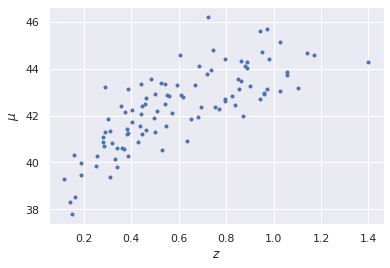

In [14]:
plt.plot(z_sample, mu_sample, '.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.show()

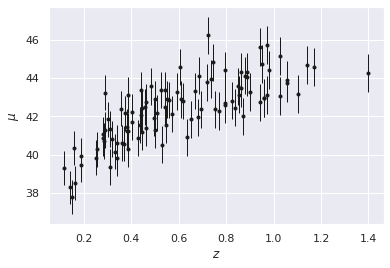

In [15]:
plt.errorbar(z_sample, mu_sample, dmu,fmt='.k', lw=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.show()